# Problem 1: Efficient implementation
**1) Write a function “sumtest(array of ints, int)” that tests whether any combination of two elements in the array sums up to a testsum and returns a boolean if this is so. Assume that the array of integers is sorted.  For example,
sumtest([1,5,7,9], 6) should return true because 1 + 5 = 6
sumtest([1,5,7,9], 7) should return false.**

In [1]:
import itertools
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def sumtest(array_of_ints,test_int):
    '''
    --- PURPOSE ---
    Test to see if the sum of any two elements
    in array_of_ints equals test_int. 
    Assume array_of_ints is sorted
    --- INPUT ---
    array_of_ints    sorted array of integers (i.e. negative whole numbers, 0, positive whole numbers)
                     There could be repeats
    test_int         integer
    --- OUTPUT ---
    bool
    '''
    
    two_element_combo_generator = itertools.combinations(array_of_ints,2) # a generator of sorted tuples containing each pair without duplication 
    for combo in two_element_combo_generator:
        if sum(combo) == test_int:
            return True 
    else: # for loop ends, not finding a sum equal to test_int 
        return False

In [5]:
# tests
print(sumtest([1,5,7,9], 6))
print(sumtest([1,5,7,9], 7))

True
False


**2) What is the fastest implementation that you can construct? **

Ultimately, all elements in the array_of_ints must be looped through at least once in the worst case, so theoretically the fastest implementation will be O(N), i.e. linear in the lookup time. The implementation above uses a generator to construct the list of pair combinations, which is much faster than storing a list because it calculates the pair sum on the fly rather than ahead of time. It also uses Python's itertools module which is more efficient than a manual implementation. 

I tried another implementation which does not use combinations, but it was not as fast (see below).

If we know that test_int has a decent chance of being outside of the range of array_of_ints (e.g. test_int=1000 and array_of_ints=[1,2,3,4,5]), then it might make sense to add in a check before the for loop to test if test_int > 2\*max(array_of_ints) or test_int < 2\*min(array_of_ints). This extra piece is O(N) because of the max() and min() calculations, so it may not worth including if we don't know anything about the distribution of test_int relative to the range of array_of_ints. In a real-world implementation, I would test both methods on a subset of the data to compare relative speeds.

**3) What is its runtime as function of the length of the array N? **

In [6]:
# Let's assume that we know test int is within the range of array_of_ints
np.random.seed(0)
# Test N=100,200,...,10000
max_ranges = range(100,10000,100)
test_ints = [np.random.randint(0,N) for N in max_ranges] # random integer between 0 and N
print test_ints # these are the test_int values for each of the cases I will test

[44, 47, 117, 192, 323, 359, 9, 723, 277, 754, 599, 1094, 600, 314, 705, 1510, 551, 87, 174, 1624, 1701, 537, 2120, 1940, 2163, 976, 755, 2046, 1871, 2496, 2898, 99, 2008, 3249, 755, 797, 659, 3219, 2958, 423, 3337, 2745, 544, 714, 2292, 151, 2723, 3531, 2930, 1207, 802, 2176, 2176, 1956, 3622, 3560, 756, 4369, 4484, 1641, 3114, 5562, 4984, 4353, 5441, 4071, 4009, 2105, 6435, 3942, 3191, 6923, 430, 7250, 4187, 6016, 2446, 2659, 1589, 2956, 2681, 2251, 4420, 7108, 1071, 5251, 7012, 3918, 1684, 7098, 2957, 4469, 8752, 5795, 1472, 7263, 7365, 8448, 6001]


In [7]:
elapsed_times = []
for ii in range(len(max_ranges)):
    max_range = max_ranges[ii]
    array_of_ints = range(0,max_range)
    test_int = test_ints[ii]
    start_time = time.time()
    answer = sumtest(array_of_ints,test_int)
    end_time = time.time()
    elapsed_time = end_time-start_time
    elapsed_times.append(elapsed_time)

(0, 0.005)

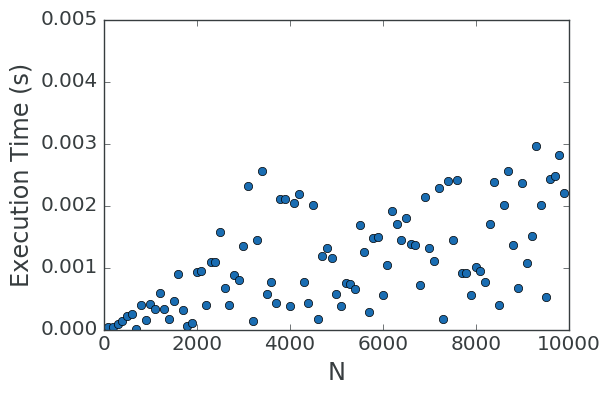

In [13]:
fig,ax=plt.subplots()
ax.plot(max_ranges,elapsed_times,'o')
ax.set_xlabel('N')
ax.set_ylabel('Execution Time (s)')
ax.set_ylim(0,5E-3)

It looks approximately linear in execution time, definitely not much worse than linear. This is for the case where we know the test_int is not larger than the max of array_of_ints or smaller than the min (for negative numbers).

The other implementation I tried was:

In [14]:
def sumtest_method2(array_of_ints, test_int):
    lo_index = 0
    hi_index = len(array_of_ints) - 1
    while lo_index < hi_index:
        pairsum = array_of_ints[lo_index] + array_of_ints[hi_index]
        if pairsum < test_int:
            lo_index += 1
        elif pairsum > test_int:
            hi_index -= 1
        else:
            return True
    else:
        return False

In [15]:
# Time this one vs. N
elapsed_times_method2 = []
for ii in range(len(max_ranges)):
    max_range = max_ranges[ii]
    array_of_ints = range(0,max_range)
    test_int = test_ints[ii]
    start_time = time.time()
    answer = sumtest_method2(array_of_ints,test_int)
    end_time = time.time()
    elapsed_time = end_time-start_time
    elapsed_times_method2.append(elapsed_time)

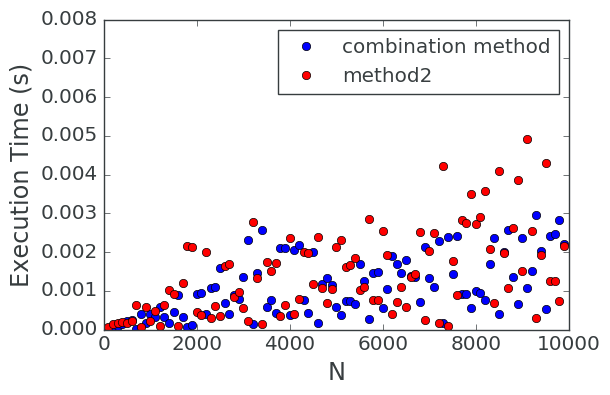

In [25]:
# Plot this one next to the first method
fig,ax=plt.subplots()
ax.plot(max_ranges,elapsed_times,'bo',label='combination method')
ax.plot(max_ranges,elapsed_times_method2,'ro',label='method2')
ax.set_xlabel('N')
ax.set_ylabel('Execution Time (s)')
ax.set_ylim(0,8E-3)
ax.legend()

Both methods scale approximately linearly, but the combination method is slightly faster on average. Note that I used the same random integers when testing both methods.

** 4) How does the runtime change if the array needs to be sorted first?**
Sorting is at best O(N log N) which is slower than the O(N) implementation, so the resulting runtime will scale as N log N.